In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from IPython.display import Markdown, display
import random


def Single_column_variation(df = None, column = None, min_value = 0, max_value = 40):
    df_list = list()
    for i in range(len(df)-1):
        df_list.append(pd.DataFrame(df.iloc[i]).transpose())           
        df_list[i] = pd.DataFrame(np.repeat(df_list[i].values,
                                  max_value-min_value, axis=0), columns=df_list[i].columns)  
    
        for k in range(min_value,max_value):
            df_list[i][column][k] = k    
    return df_list

#Predicting the best stats probability of winning via function
def Best_stats(df, model=None):
    results = list()
    max_prob = list()

    for i in range(len(df)-1):
        
        results.append(model.predict_proba(df[i])[:,1])  
        max_prob.append(results[i].argmax())   
        
    return results, max_prob

def printmd(string):
    display(Markdown(string))

In [34]:
df = pd.read_csv('games_details.csv')
seasons = pd.read_csv('games.csv')[["GAME_ID","SEASON"]]

C:\Users\sruth_wflnafi\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [35]:
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 668628 entries, 0 to 668627
Data columns (total 29 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   GAME_ID            668628 non-null  int64  
 1   TEAM_ID            668628 non-null  int64  
 2   TEAM_ABBREVIATION  668628 non-null  object 
 3   TEAM_CITY          668628 non-null  object 
 4   PLAYER_ID          668628 non-null  int64  
 5   PLAYER_NAME        668628 non-null  object 
 6   NICKNAME           53037 non-null   object 
 7   START_POSITION     255765 non-null  object 
 8   COMMENT            109689 non-null  object 
 9   MIN                558938 non-null  object 
 10  FGM                558938 non-null  float64
 11  FGA                558938 non-null  float64
 12  FG_PCT             558938 non-null  float64
 13  FG3M               558938 non-null  float64
 14  FG3A               558938 non-null  float64
 15  FG3_PCT            558938 non-null  float64
 16  FT

In [37]:
seasons.head()

,GAME_ID,SEASON
0,22200477,2022
1,22200478,2022
2,22200466,2022
3,22200467,2022
4,22200468,2022


Dropping "Game ID, Team ID, Played ID as they are not needed for this report.

In [38]:
df.drop(["GAME_ID","TEAM_ID","PLAYER_ID"],axis=1).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
FGM,558938.0,3.588446,3.030466,0.0,1.000,3.000,5.000,28.0
FGA,558938.0,7.896652,5.677002,0.0,3.000,7.000,11.000,50.0
FG_PCT,558938.0,0.416842,0.251913,0.0,0.267,0.429,0.571,1.0
FG3M,558938.0,0.778117,1.227615,0.0,0.000,0.000,1.000,14.0
FG3A,558938.0,2.186019,2.569913,0.0,0.000,1.000,4.000,24.0
FG3_PCT,558938.0,0.201032,0.289685,0.0,0.000,0.000,0.400,1.0
FTM,558938.0,1.733217,2.353981,0.0,0.000,1.000,3.000,26.0
FTA,558938.0,2.284212,2.886583,0.0,0.000,2.000,4.000,39.0
FT_PCT,558938.0,0.435949,0.428166,0.0,0.000,0.500,0.909,1.0
OREB,558938.0,1.024212,1.397830,0.0,0.000,1.000,2.000,18.0


Preprocessing/ Data Cleaning and Exploratory data analysis is performed to clean the data. Identifying the duplicates records of player stats, which are then dropped.

In [39]:
df[df.duplicated(subset=["GAME_ID","PLAYER_ID"], keep="first")]

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
65979,22000069,1610612763,MEM,Memphis,1628960,Grayson Allen,NaN,NaN,DNP - Injury/Illness,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65980,22000069,1610612763,MEM,Memphis,1629007,Jontay Porter,NaN,NaN,DNP - Injury/Illness,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65981,22000069,1610612763,MEM,Memphis,1630214,Xavier Tillman,NaN,NaN,DNP - Injury/Illness,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65982,22000069,1610612766,CHA,Charlotte,1630176,Vernon Carey Jr.,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65983,22000069,1610612766,CHA,Charlotte,1628370,Malik Monk,NaN,NaN,DNP - Coach's Decision,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82829,22000002,1610612746,LAC,LA,1628379,Luke Kennard,NaN,NaN,NaN,21:03,...,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,4.0,-3.0
82830,22000002,1610612747,LAL,Los Angeles,203484,Kentavious Caldwell-Pope,NaN,G,NaN,23:03,...,0.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,9.0,-9.0
82831,22000002,1610612747,LAL,Los Angeles,203471,Dennis Schroder,NaN,G,NaN,27:48,...,1.0,11.0,12.0,8.0,0.0,0.0,1.0,4.0,14.0,-10.0
82832,22000002,1610612747,LAL,Los Angeles,1628398,Kyle Kuzma,NaN,NaN,NaN,26:38,...,0.0,1.0,1.0,0.0,0.0,0.0,2.0,2.0,15.0,1.0


In [40]:
df.drop_duplicates(subset=["GAME_ID","PLAYER_ID"],keep="first",inplace=True)

In [41]:
df

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,PLUS_MINUS
0,22200477,1610612759,SAS,San Antonio,1629641,Romeo Langford,Romeo,F,NaN,18:06,...,1.0,1.0,2.0,0.0,1.0,0.0,2.0,5.0,2.0,-2.0
1,22200477,1610612759,SAS,San Antonio,1631110,Jeremy Sochan,Jeremy,F,NaN,31:01,...,6.0,3.0,9.0,6.0,1.0,0.0,2.0,1.0,23.0,-14.0
2,22200477,1610612759,SAS,San Antonio,1627751,Jakob Poeltl,Jakob,C,NaN,21:42,...,1.0,3.0,4.0,1.0,1.0,0.0,2.0,4.0,13.0,-4.0
3,22200477,1610612759,SAS,San Antonio,1630170,Devin Vassell,Devin,G,NaN,30:20,...,0.0,9.0,9.0,5.0,3.0,0.0,2.0,1.0,10.0,-18.0
4,22200477,1610612759,SAS,San Antonio,1630200,Tre Jones,Tre,G,NaN,27:44,...,0.0,2.0,2.0,3.0,0.0,0.0,2.0,2.0,19.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668623,11200005,1610612743,DEN,Denver,202706,Jordan Hamilton,NaN,NaN,NaN,19,...,0.0,2.0,2.0,0.0,2.0,0.0,1.0,3.0,17.0,NaN
668624,11200005,1610612743,DEN,Denver,202702,Kenneth Faried,NaN,NaN,NaN,23,...,1.0,0.0,1.0,1.0,1.0,0.0,3.0,3.0,18.0,NaN
668625,11200005,1610612743,DEN,Denver,201585,Kosta Koufos,NaN,NaN,NaN,15,...,3.0,5.0,8.0,0.0,1.0,0.0,0.0,3.0,6.0,NaN
668626,11200005,1610612743,DEN,Denver,202389,Timofey Mozgov,NaN,NaN,NaN,19,...,1.0,2.0,3.0,1.0,0.0,0.0,4.0,2.0,2.0,NaN


Now, the statistics of player and the game are grouped.

In [42]:
df = df.groupby(["GAME_ID","TEAM_ID"]).sum()
df = df.reset_index()
df = df.drop(['PLAYER_ID', 'FG_PCT','FG3_PCT','FT_PCT','PLUS_MINUS'],axis=1)

df["FG_PCT"] = df["FGM"]/df["FGA"]*100
df["FG3_PCT"] = df["FG3M"]/df["FG3A"]*100
df["FT_PCT"] = df["FTM"]/df["FTA"]*100

Null values are now removed.

In [43]:
print (f"There is still {df.isna().sum().sum()} null values.\n")
print ("There is a game with 3 unique rows.\n")

print(df["GAME_ID"].value_counts().sort_values().tail(5))

display(df[df["GAME_ID"] == 10500109])

#dropping the null row

df = df.drop(index=335,axis=0)
df = df.reset_index().drop("index",axis=1)

There is still 3 null values.

There is a game with 3 unique rows.

20701156    2
22200072    2
20500422    2
21800939    2
10500109    3
Name: GAME_ID, dtype: int64


,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,FG_PCT,FG3_PCT,FT_PCT
334,10500109,1610612742,36.0,73.0,5.0,16.0,26.0,35.0,10.0,27.0,37.0,18.0,8.0,9.0,13.0,19.0,103.0,49.315068,31.250000,74.285714
335,10500109,1610612756,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
336,10500109,1610612765,40.0,87.0,4.0,9.0,13.0,15.0,15.0,26.0,41.0,20.0,7.0,11.0,13.0,29.0,97.0,45.977011,44.444444,86.666667


In [44]:
df.loc[7002,"PTS"] = 90
df.loc[7623,"PTS"] = 103 

In [45]:
df

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,REB,AST,STL,BLK,TO,PF,PTS,FG_PCT,FG3_PCT,FT_PCT
0,10300001,1610612742,34.0,76.0,2.0,8.0,15.0,30.0,12.0,26.0,38.0,20.0,9.0,4.0,18.0,34.0,85.0,44.736842,25.000000,50.000000
1,10300001,1610612762,32.0,70.0,1.0,7.0,25.0,34.0,9.0,32.0,41.0,23.0,8.0,4.0,18.0,26.0,90.0,45.714286,14.285714,73.529412
2,10300002,1610612749,32.0,75.0,2.0,13.0,28.0,40.0,11.0,32.0,43.0,20.0,9.0,4.0,24.0,26.0,94.0,42.666667,15.384615,70.000000
3,10300002,1610612763,40.0,81.0,4.0,15.0,21.0,34.0,14.0,34.0,48.0,25.0,18.0,7.0,25.0,35.0,105.0,49.382716,26.666667,61.764706
4,10300003,1610612739,38.0,77.0,4.0,6.0,20.0,29.0,12.0,40.0,52.0,25.0,10.0,7.0,25.0,33.0,100.0,49.350649,66.666667,68.965517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53041,52100131,1610612759,37.0,91.0,13.0,34.0,16.0,22.0,8.0,26.0,34.0,19.0,4.0,3.0,6.0,20.0,103.0,40.659341,38.235294,72.727273
53042,52100201,1610612737,39.0,80.0,9.0,31.0,20.0,22.0,10.0,32.0,42.0,15.0,5.0,3.0,13.0,19.0,107.0,48.750000,29.032258,90.909091
53043,52100201,1610612739,37.0,81.0,13.0,36.0,14.0,17.0,8.0,28.0,36.0,23.0,8.0,4.0,11.0,20.0,101.0,45.679012,36.111111,82.352941
53044,52100211,1610612740,43.0,88.0,6.0,22.0,13.0,25.0,17.0,37.0,54.0,20.0,2.0,3.0,8.0,26.0,105.0,48.863636,27.272727,52.000000


Introducing a label called "VICTORY", with "Yes" or "No" values by calculating the points by the two teams in a game. 

In [46]:
df = df.sort_values("GAME_ID")   #Sorting by GAME_ID, to avoid any bug in the following rows
df["VICTORY"] = ""

for i in range(0,len(df)-1,2):
    if df["PTS"][i] > df["PTS"][i+1]:   # To Check which of the two team has won and update the "VICTORY" 
        
        df.loc[i , "VICTORY"] = "Yes"
        df.loc[i+1 , "VICTORY"] = "No"
        
    elif df["PTS"][i] < df["PTS"][i+1]:
        
        df.loc[i , "VICTORY"] = "No"
        df.loc[i+1 , "VICTORY"] = "Yes"  
        
    else:                             # To Check for eventual rows with problems
        print("Tie game?")
        print(df.iloc[i])

Tie game?
GAME_ID      20400769
TEAM_ID    1610612738
FGM              29.0
FGA              64.0
FG3M              4.0
FG3A             11.0
FTM              26.0
FTA              34.0
OREB              9.0
DREB             33.0
REB              42.0
AST              17.0
STL              10.0
BLK               6.0
TO               22.0
PF               25.0
PTS              88.0
FG_PCT        45.3125
FG3_PCT     36.363636
FT_PCT      76.470588
VICTORY              
Name: 7264, dtype: object
Tie game?
GAME_ID      20401079
TEAM_ID    1610612751
FGM              37.0
FGA              84.0
FG3M              5.0
FG3A             23.0
FTM              23.0
FTA              33.0
OREB             12.0
DREB             31.0
REB              43.0
AST              22.0
STL               7.0
BLK               3.0
TO               13.0
PF               31.0
PTS             102.0
FG_PCT      44.047619
FG3_PCT      21.73913
FT_PCT       69.69697
VICTORY              
Name: 7884, dtype: object


In [47]:
df = pd.merge(df,seasons,how="left",on="GAME_ID")
df.head()

,GAME_ID,TEAM_ID,FGM,FGA,FG3M,FG3A,FTM,FTA,OREB,DREB,...,STL,BLK,TO,PF,PTS,FG_PCT,FG3_PCT,FT_PCT,VICTORY,SEASON
0,10300001,1610612742,34.0,76.0,2.0,8.0,15.0,30.0,12.0,26.0,...,9.0,4.0,18.0,34.0,85.0,44.736842,25.000000,50.000000,No,2003
1,10300001,1610612762,32.0,70.0,1.0,7.0,25.0,34.0,9.0,32.0,...,8.0,4.0,18.0,26.0,90.0,45.714286,14.285714,73.529412,Yes,2003
2,10300002,1610612749,32.0,75.0,2.0,13.0,28.0,40.0,11.0,32.0,...,9.0,4.0,24.0,26.0,94.0,42.666667,15.384615,70.000000,No,2003
3,10300002,1610612763,40.0,81.0,4.0,15.0,21.0,34.0,14.0,34.0,...,18.0,7.0,25.0,35.0,105.0,49.382716,26.666667,61.764706,Yes,2003
4,10300003,1610612739,38.0,77.0,4.0,6.0,20.0,29.0,12.0,40.0,...,10.0,7.0,25.0,33.0,100.0,49.350649,66.666667,68.965517,Yes,2003


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53104 entries, 0 to 53103
Data columns (total 22 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   GAME_ID  53104 non-null  int64  
 1   TEAM_ID  53104 non-null  int64  
 2   FGM      53104 non-null  float64
 3   FGA      53104 non-null  float64
 4   FG3M     53104 non-null  float64
 5   FG3A     53104 non-null  float64
 6   FTM      53104 non-null  float64
 7   FTA      53104 non-null  float64
 8   OREB     53104 non-null  float64
 9   DREB     53104 non-null  float64
 10  REB      53104 non-null  float64
 11  AST      53104 non-null  float64
 12  STL      53104 non-null  float64
 13  BLK      53104 non-null  float64
 14  TO       53104 non-null  float64
 15  PF       53104 non-null  float64
 16  PTS      53104 non-null  float64
 17  FG_PCT   53104 non-null  float64
 18  FG3_PCT  53104 non-null  float64
 19  FT_PCT   53104 non-null  float64
 20  VICTORY  53104 non-null  object 
 21  SEASON   531

## Exploratory Data Analysis

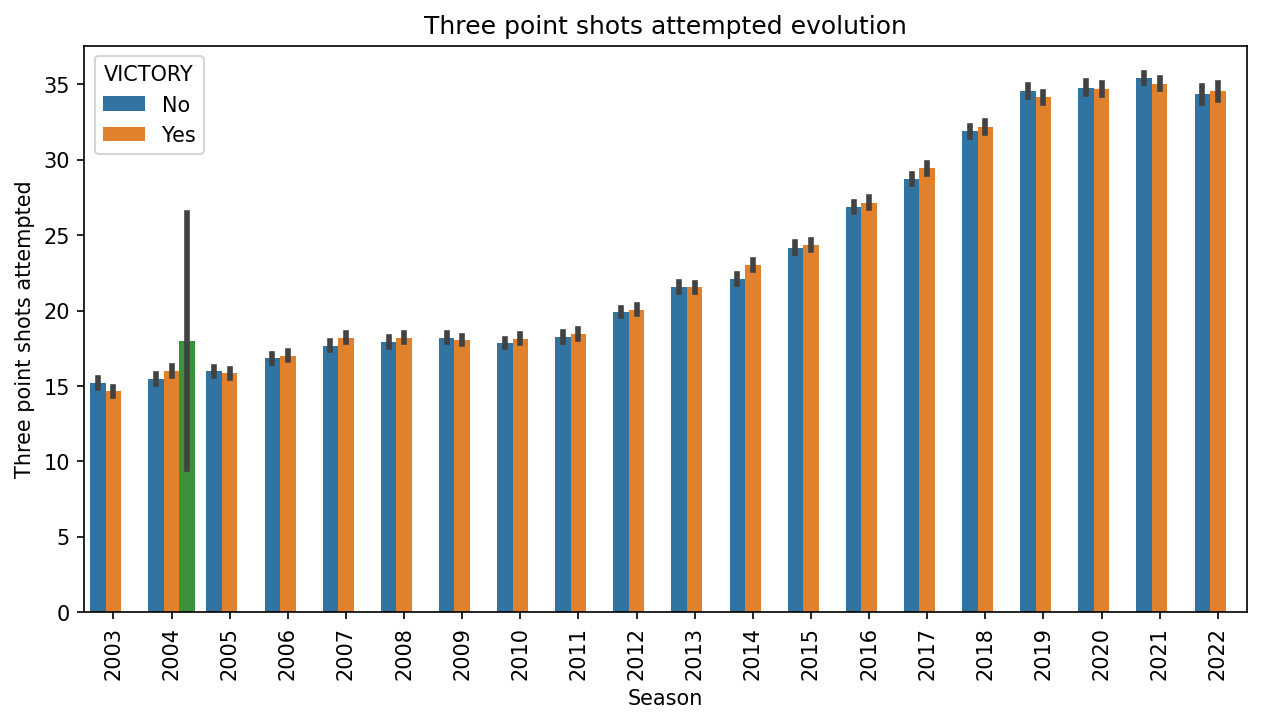

In [49]:
plt.figure(figsize=(10,5),dpi=150)
ax = sns.barplot(data=df,x="SEASON",y="FG3A",hue="VICTORY")

ax.set(ylabel="Three point shots attempted", xlabel="Season")
ax.set_title("Three point shots attempted evolution")

plt.xticks(rotation=90);

As three point shots evolved over the years, to see the percentages of success of a team.

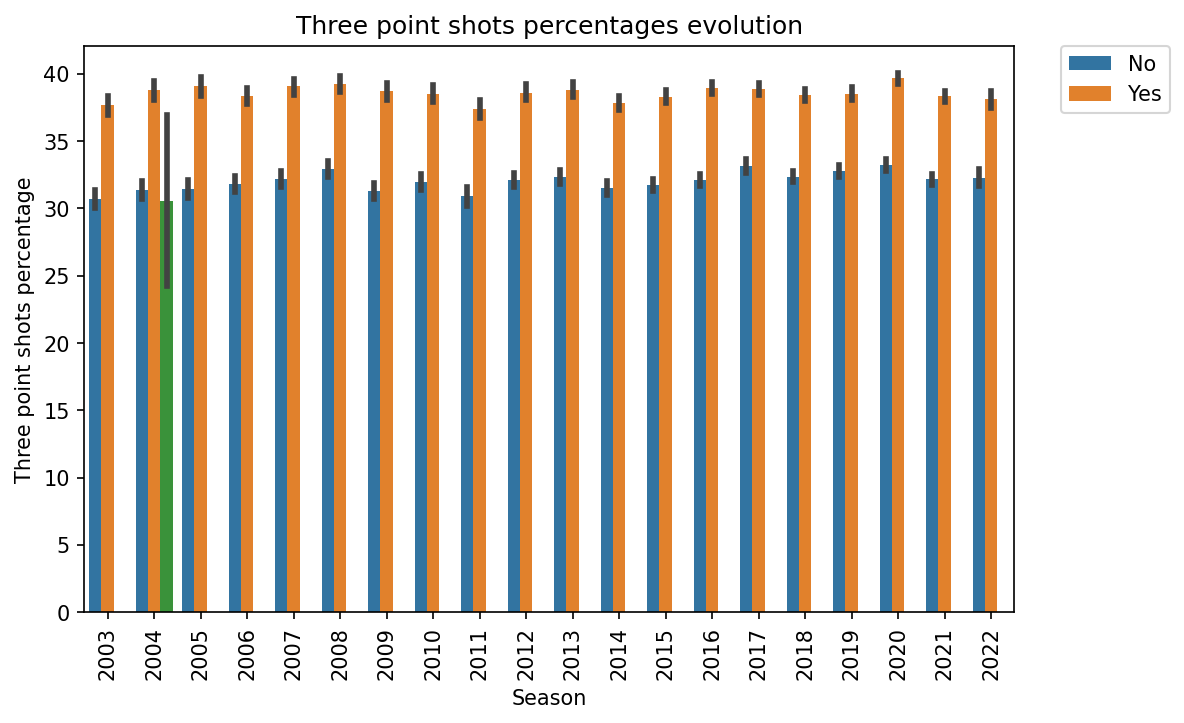

In [50]:
plt.figure(figsize=(8,5),dpi=150)
ax = sns.barplot(data=df,x="SEASON",y="FG3_PCT",hue="VICTORY")

ax.set(ylabel="Three point shots percentage", xlabel="Season")
ax.set_title("Three point shots percentages evolution")
plt.legend(bbox_to_anchor=(1.05, 1), borderaxespad=0.)

plt.xticks(rotation=90);

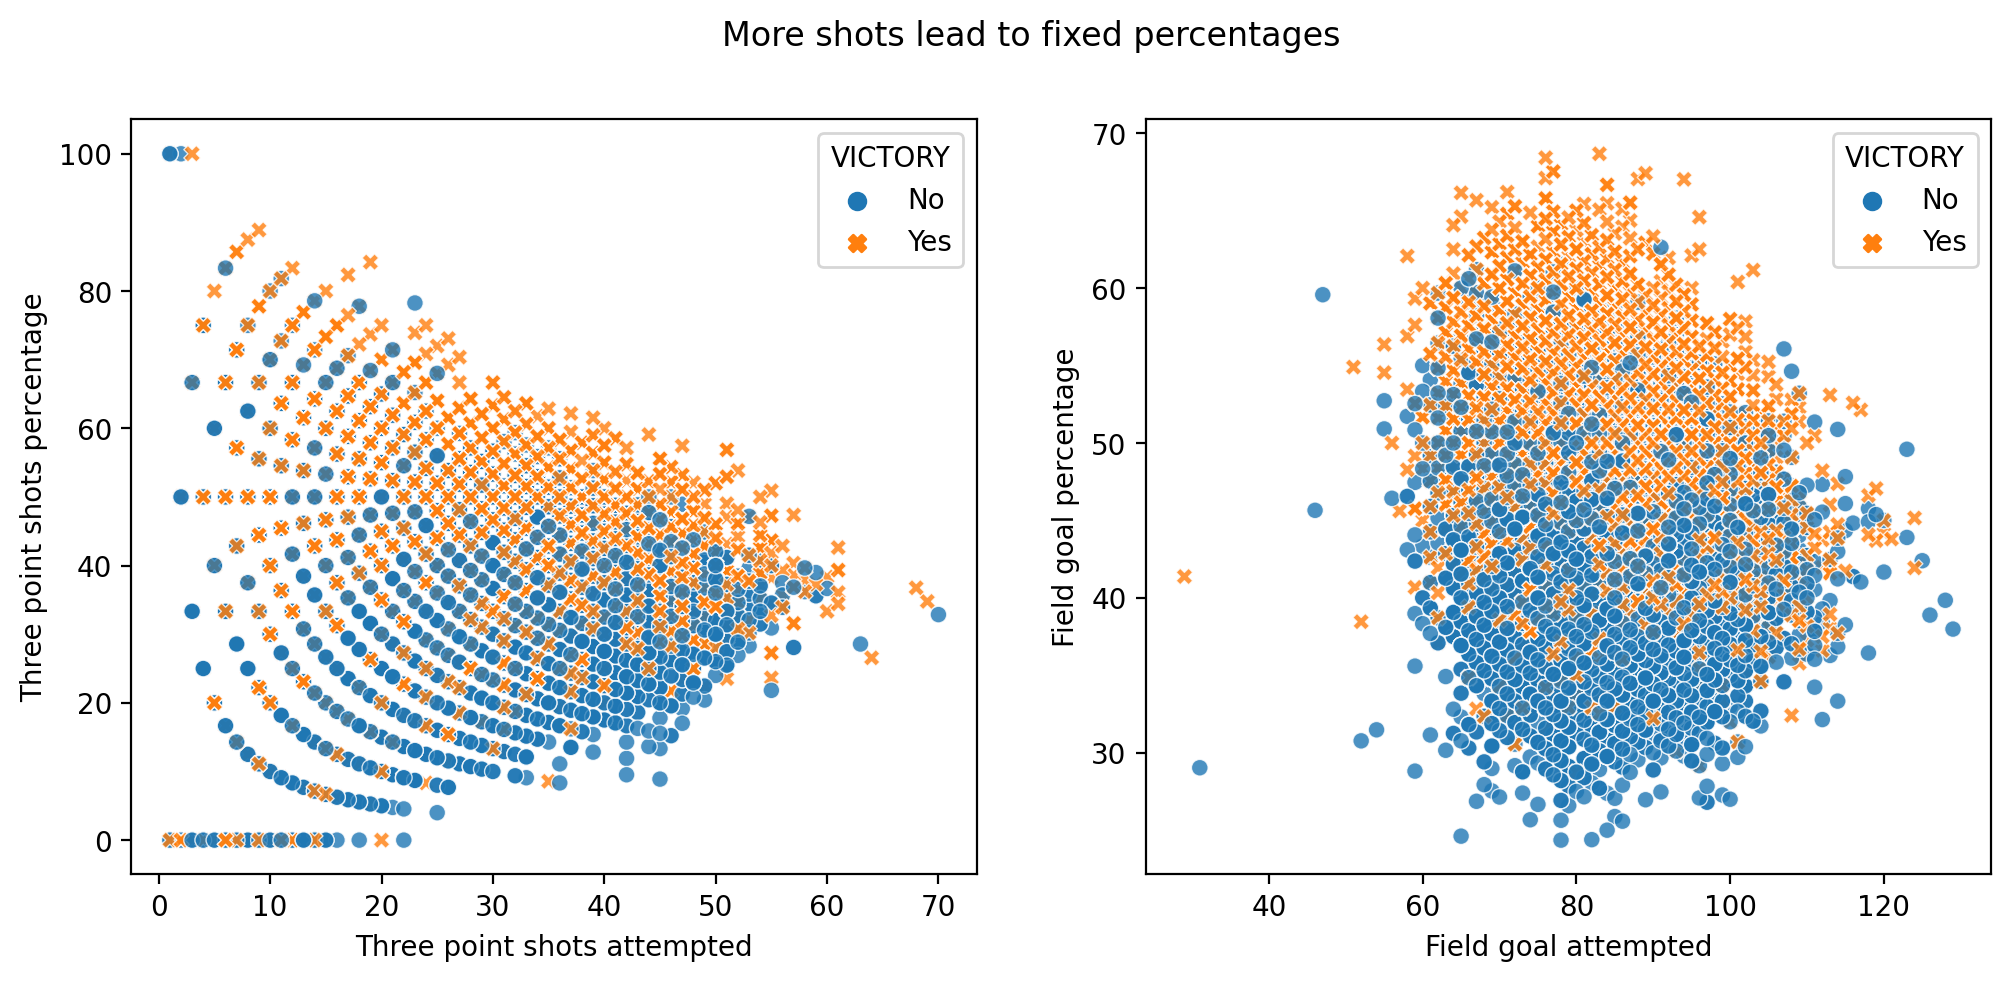

In [51]:
fig, ax = plt.subplots(1,2,figsize=(12,5),dpi=200)

plt.suptitle("More shots lead to fixed percentages")

sns.scatterplot(ax = ax[0],data=df,x="FG3A",y="FG3_PCT",hue="VICTORY",style="VICTORY",alpha=0.8)
ax[0].set(ylabel="Three point shots percentage", xlabel="Three point shots attempted")

sns.scatterplot(ax = ax[1],data=df,x="FGA",y="FG_PCT",hue="VICTORY",style="VICTORY",alpha=0.8) 
ax[1].set(ylabel="Field goal percentage", xlabel="Field goal attempted")

plt.show()

Now, comparing the amount of shots with the points made during a game

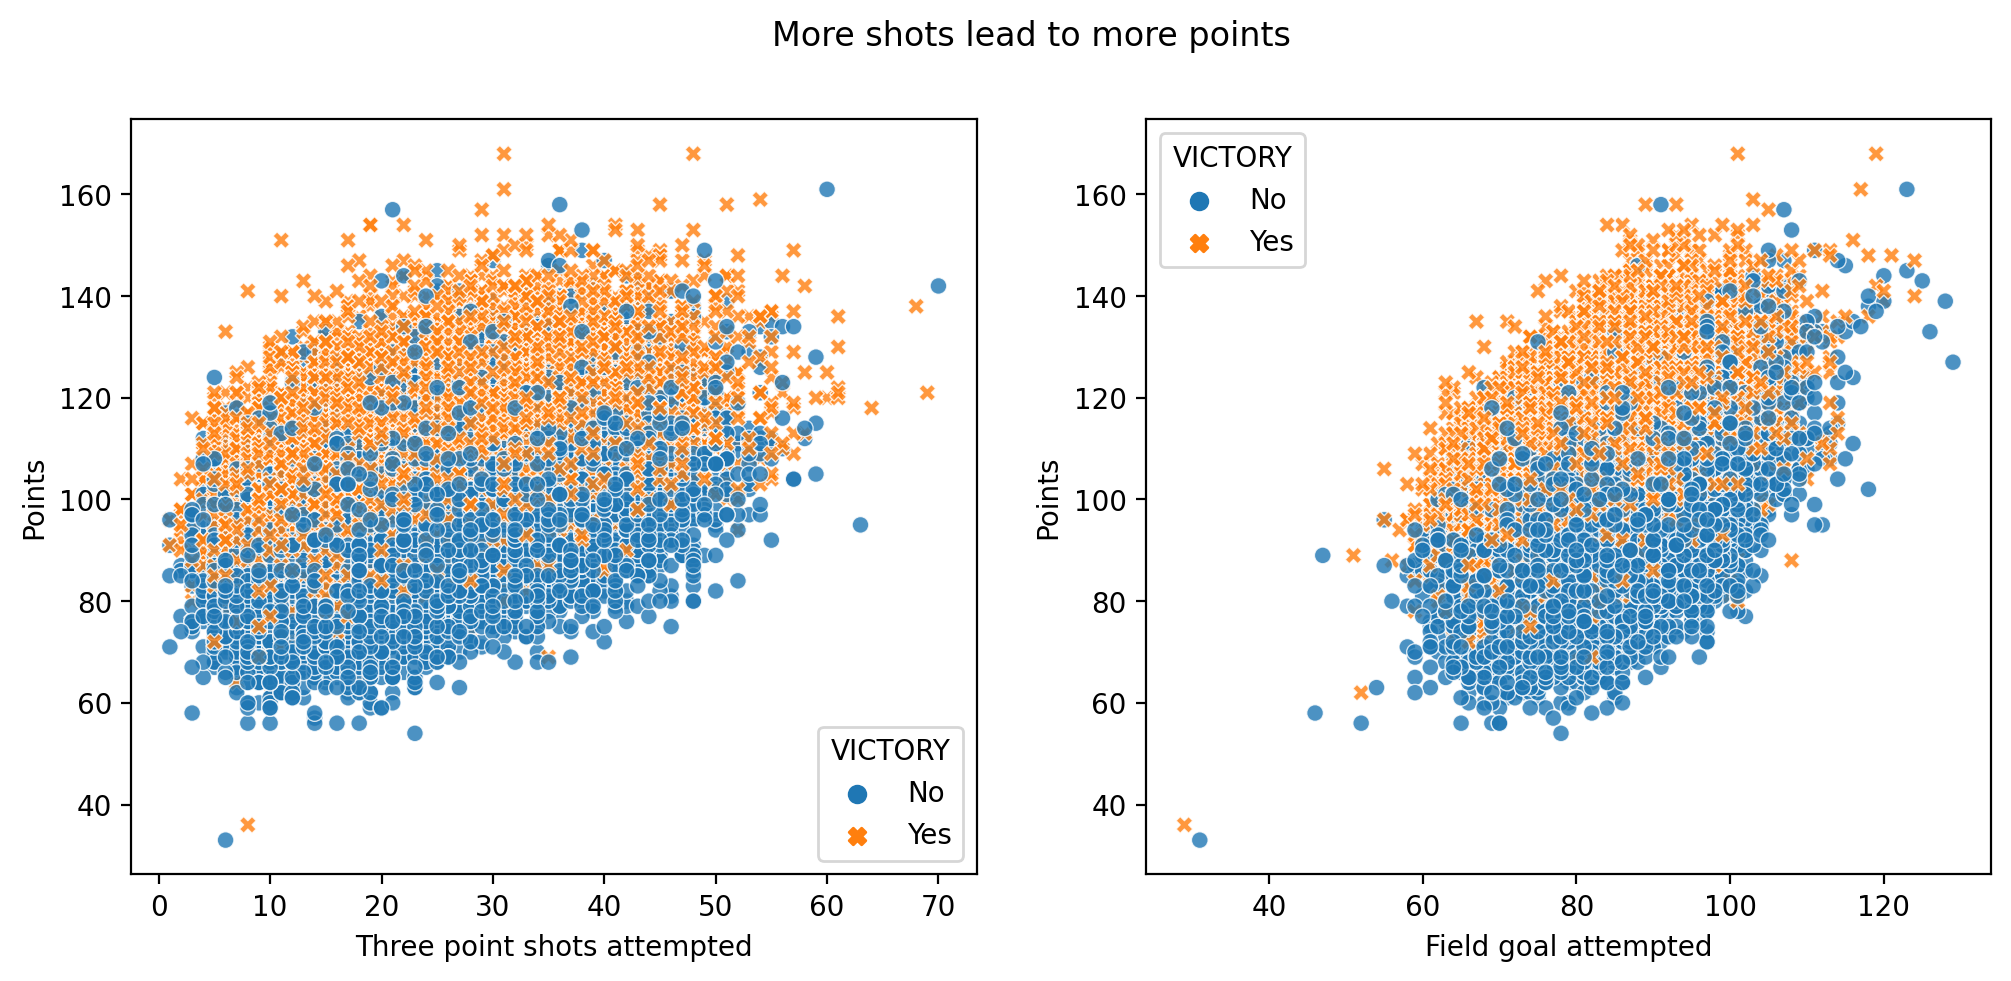

In [52]:
fig, ax = plt.subplots(1,2,figsize=(12,5), dpi=200)

plt.suptitle("More shots lead to more points")

sns.scatterplot(ax = ax[0], data = df, y = "PTS", x = "FG3A", hue = "VICTORY",style="VICTORY",alpha=0.8)
ax[0].set(xlabel="Three point shots attempted", ylabel="Points")

sns.scatterplot(ax = ax[1], data=df, y="PTS", x="FGA", hue="VICTORY",style="VICTORY",alpha=0.8)
ax[1].set(xlabel="Field goal attempted", ylabel="Points")

plt.show()

## Implementing Machine Learning Models

Splitting the dataset to 3 different models with 3 different time periods.

2003 - 2009
2010 - 2014
2015 - 2020

### Random Forest Classifier

In [53]:
# Data split based on the following timelines

first_split = df[df["SEASON"] < 2010]
second_split = df[(df["SEASON"] >= 2010) & (df["SEASON"] < 2015)]
third_split = df[df["SEASON"] >= 2015]

# ML model for the first data split (2003-2009)

X1 = first_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y1 = first_split["VICTORY"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=27)

#Train

model_first_split = RandomForestClassifier(bootstrap=True)
model_first_split.fit(X1_train,y1_train)

#Predict

y1_pred = model_first_split.predict(X1_test)

# ML model for the second data split (2010-2014)
    
X2 = second_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y2 = second_split["VICTORY"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=27)

#Train

model_second_split = RandomForestClassifier(bootstrap=True)
model_second_split.fit(X2_train,y2_train)

#Predict

y2_pred = model_second_split.predict(X2_test)

# ML model for the third data split (2015-2020)

X3 = third_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y3 = third_split["VICTORY"]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=27)

#Train

model_third_split = RandomForestClassifier(bootstrap=True)
model_third_split.fit(X3_train,y3_train)

#Predict

y3_pred = model_third_split.predict(X3_test)

In [54]:
printmd("These are the results for the first model (2003-2009)\n")
print(classification_report(y1_test,y1_pred))

printmd("These are the results for the second model (2010-2014)\n")
print(classification_report(y2_test,y2_pred))

printmd("These are the results for the third model (2015-2020)\n")
print(classification_report(y3_test,y3_pred))

These are the results for the first model (2003-2009)


              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
          No       0.80      0.81      0.80      2947
         Yes       0.80      0.80      0.80      2908

    accuracy                           0.80      5856
   macro avg       0.54      0.54      0.54      5856
weighted avg       0.80      0.80      0.80      5856



C:\Users\sruth_wflnafi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sruth_wflnafi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sruth_wflnafi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


These are the results for the second model (2010-2014)


              precision    recall  f1-score   support

          No       0.80      0.81      0.81      2033
         Yes       0.81      0.80      0.81      2042

    accuracy                           0.81      4075
   macro avg       0.81      0.81      0.81      4075
weighted avg       0.81      0.81      0.81      4075



These are the results for the third model (2015-2020)


              precision    recall  f1-score   support

          No       0.81      0.82      0.82      3014
         Yes       0.82      0.80      0.81      2988

    accuracy                           0.81      6002
   macro avg       0.81      0.81      0.81      6002
weighted avg       0.81      0.81      0.81      6002



### Support Vector Machine

In [55]:
from sklearn import svm

X1 = first_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y1 = first_split["VICTORY"]

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=27)

model_svm1_split = svm.SVC(kernel='rbf')
model_svm1_split.fit(X1_train,y1_train)

y1_pred = model_svm1_split.predict(X1_test)

X2 = second_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y2 = second_split["VICTORY"]

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=27)


model_svm2_split = svm.SVC(kernel='rbf')
model_svm2_split.fit(X2_train,y2_train)


y2_pred = model_svm2_split.predict(X2_test)


X3 = third_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y3 = third_split["VICTORY"]

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=27)


model_svm3_split = svm.SVC(kernel='rbf')
model_svm3_split.fit(X3_train,y3_train)


y3_pred = model_svm3_split.predict(X3_test)

In [56]:
printmd("These are the results for the first model (2003-2009)\n")
print(classification_report(y1_test,y1_pred))

printmd("These are the results for the Second model (2010-2014)\n")
print(classification_report(y2_test,y2_pred))

printmd("These are the results for the Third model (2015-2020)\n")
print(classification_report(y3_test,y3_pred))

These are the results for the first model (2003-2009)


              precision    recall  f1-score   support

                   0.00      0.00      0.00         1
          No       0.83      0.85      0.84      2947
         Yes       0.84      0.83      0.83      2908

    accuracy                           0.84      5856
   macro avg       0.56      0.56      0.56      5856
weighted avg       0.84      0.84      0.84      5856



C:\Users\sruth_wflnafi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sruth_wflnafi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sruth_wflnafi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


These are the results for the Second model (2010-2014)


              precision    recall  f1-score   support

          No       0.84      0.84      0.84      2033
         Yes       0.84      0.84      0.84      2042

    accuracy                           0.84      4075
   macro avg       0.84      0.84      0.84      4075
weighted avg       0.84      0.84      0.84      4075



These are the results for the Third model (2015-2020)


              precision    recall  f1-score   support

          No       0.84      0.85      0.85      3014
         Yes       0.85      0.84      0.84      2988

    accuracy                           0.85      6002
   macro avg       0.85      0.85      0.85      6002
weighted avg       0.85      0.85      0.85      6002



### XGBoost Classifier

In [57]:
!pip install xgboost
from xgboost import XGBClassifier

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
first_split = df[df["SEASON"] < 2010]
second_split = df[(df["SEASON"] >= 2010) & (df["SEASON"] < 2015)]
third_split = df[df["SEASON"] >= 2015]

le = LabelEncoder()

X1 = first_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y1 = le.fit_transform(first_split["VICTORY"])

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=27)

model_first_split = XGBClassifier()
model_first_split.fit(X1_train,y1_train)

y1_pred = model_first_split.predict(X1_test) 


X2 = second_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y2 = le.fit_transform(second_split["VICTORY"])  

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=27)

model_second_split = XGBClassifier()
model_second_split.fit(X2_train,y2_train)


y2_pred = model_second_split.predict(X2_test)

X3 = third_split.drop(["SEASON","VICTORY","FGM","FTM","FG3M","PTS","GAME_ID","TEAM_ID","REB"],axis=1)
y3 = le.fit_transform(third_split["VICTORY"])

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.3, random_state=27)


model_third_split = XGBClassifier()
model_third_split.fit(X3_train,y3_train)


y3_pred = model_third_split.predict(X3_test)

In [60]:
printmd("These are the results for the first model (2003-2009)\n")
print(classification_report(y1_test,y1_pred))

printmd("These are the results for the Second model (2010-2014)\n")
print(classification_report(y2_test,y2_pred))

printmd("These are the results for the Third model (2015-2020)\n")
print(classification_report(y3_test,y3_pred))

These are the results for the first model (2003-2009)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.82      0.83      0.83      2947
           2       0.82      0.82      0.82      2908

    accuracy                           0.82      5856
   macro avg       0.55      0.55      0.55      5856
weighted avg       0.82      0.82      0.82      5856



C:\Users\sruth_wflnafi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sruth_wflnafi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sruth_wflnafi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


These are the results for the Second model (2010-2014)


              precision    recall  f1-score   support

           0       0.82      0.81      0.82      2033
           1       0.82      0.83      0.82      2042

    accuracy                           0.82      4075
   macro avg       0.82      0.82      0.82      4075
weighted avg       0.82      0.82      0.82      4075



These are the results for the Third model (2015-2020)


              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3014
           1       0.84      0.81      0.82      2988

    accuracy                           0.83      6002
   macro avg       0.83      0.83      0.83      6002
weighted avg       0.83      0.83      0.83      6002



### Partial Derivation Plots

In [61]:
first_split_list = Single_column_variation(X1_test,"FG3A",0,60)
results_first_split, max_prob_first_split = Best_stats(first_split_list, model_first_split)

second_split_list = Single_column_variation(X2_test,"FG3A",0,60)
results_second_split, max_prob_second_split = Best_stats(second_split_list, model_second_split)

third_split_list = Single_column_variation(X3_test,"FG3A",0,60)
results_third_split, max_prob_third_split = Best_stats(third_split_list, model_third_split)

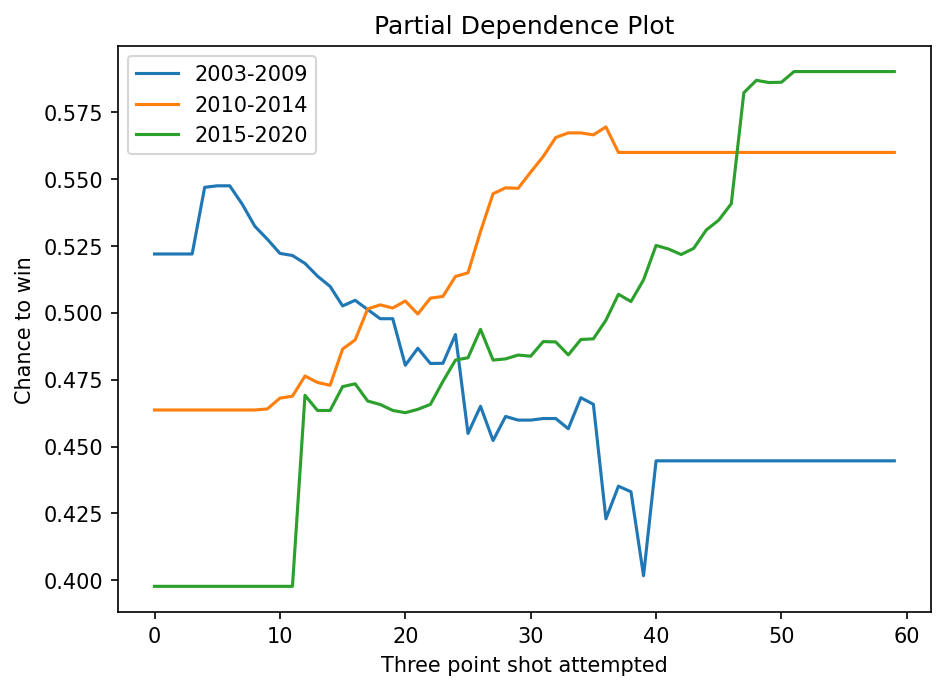

In [62]:
average1 = np.sum(results_first_split,axis=0)/len(results_first_split)
average2 = np.sum(results_second_split,axis=0)/len(results_second_split)
average3 = np.sum(results_third_split,axis=0)/len(results_third_split)

plt.figure(figsize=(7,5),dpi=150)

plt.plot(range(60),average1)
plt.plot(range(60),average2)
plt.plot(range(60),average3)

plt.legend(["2003-2009","2010-2014","2015-2020"])
plt.xlabel("Three point shot attempted")
plt.ylabel("Chance to win") 
plt.title("Partial Dependence Plot")

plt.show()

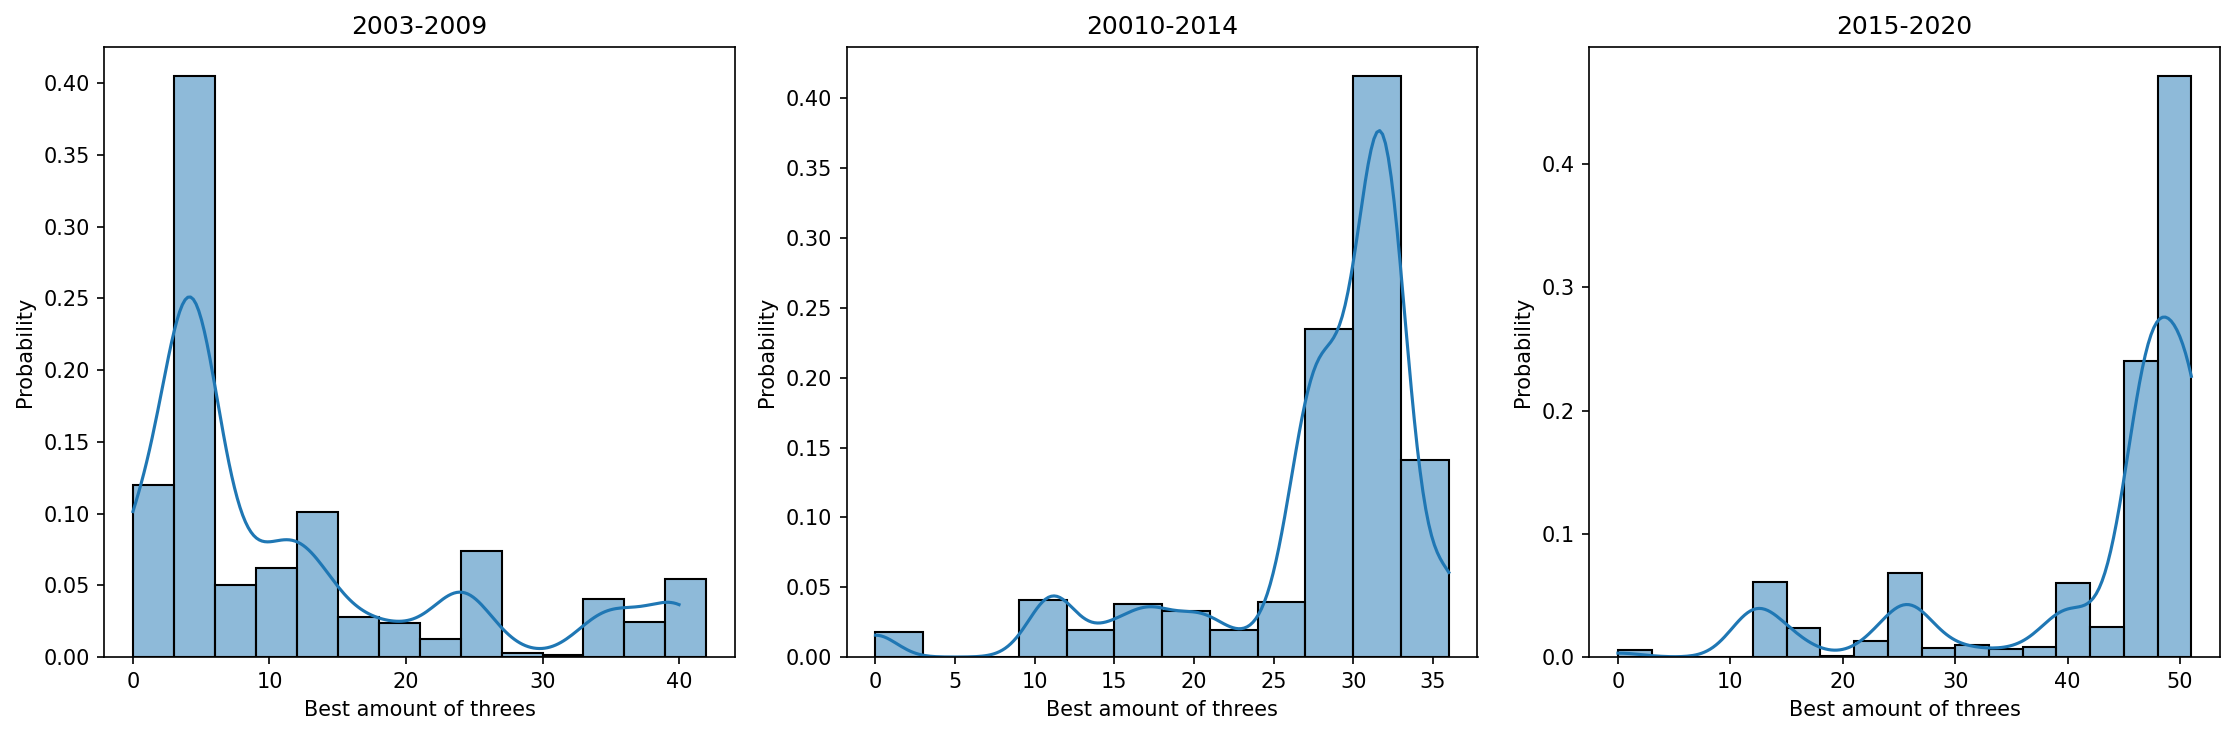

In [64]:
fig, ax = plt.subplots(1,3, figsize=(15,5), dpi=150) #plot to find the ideal number of three point shots

sns.histplot(ax = ax[0], x = max_prob_first_split, kde=True, stat="probability", binwidth=3)
ax[0].set(xlabel="Best amount of threes", title="2003-2009")

sns.histplot(ax = ax[1], x = max_prob_second_split, kde=True, stat="probability", binwidth=3)
ax[1].set(xlabel="Best amount of threes", title="20010-2014")

sns.histplot(ax = ax[2], x = max_prob_third_split, kde=True, stat="probability", binwidth=3)
ax[2].set(xlabel="Best amount of threes", title="2015-2020")

plt.tight_layout()
plt.show()

Lastly, we consider the (2003-2006) old model to play the new model (2016 -2020) and vice versa and figure out which playstyle is the best. The results are shown below

In [65]:
old_school_pred = model_third_split.predict_proba(X1)
new_school_pred = model_first_split.predict_proba(X3)

lose_mean_old = old_school_pred.mean(axis=0)[0]
win_mean_old = old_school_pred.mean(axis=0)[1]
lose_mean_new = new_school_pred.mean(axis=0)[0]
win_mean_new = new_school_pred.mean(axis=0)[1]

print("Old style team playing in the modern NBA win rate  =", win_mean_old,
     "\nNew style team playin in the past NBA win rate =", win_mean_new)

Old style team playing in the modern NBA win rate  = 0.38173428 
New style team playin in the past NBA win rate = 0.38361943


Old model's win probability is 40% where as new model's probability raised to 60% playing the NBA vice versa.